In [257]:
# Importing Library #
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re 
import string

import nltk 
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import TweetTokenizer

from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


plt.style.use("seaborn")
%matplotlib inline

In [258]:
import warnings
warnings.filterwarnings('ignore')

In [259]:
# Load Data #

df = pd.read_csv('./Musical_instruments_reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [260]:
# EDA & Data Cleaning #

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [261]:
df = df.drop(columns=['reviewerID','asin', 'reviewerName', 'helpful', 'unixReviewTime'])
df.head(100)

,reviewText,overall,summary,reviewTime
0,"Not much to write about here, but it does exac...",5.0,good,"02 28, 2014"
1,The product does exactly as it should and is q...,5.0,Jake,"03 16, 2013"
2,The primary job of this device is to block the...,5.0,It Does The Job Well,"08 28, 2013"
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014"
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,"02 21, 2014"
...,...,...,...,...
95,Bought this to hook up a Beta 58 to a Panasoni...,5.0,Does what it was intended for,"12 6, 2011"
96,Just received this cord and it seems to work a...,5.0,Works as expected,"04 25, 2012"
97,"If you're like me, you probably bought this to...",4.0,Good for some uses,"04 7, 2014"
98,I bought this for my Canon Vixia HF G10 Video ...,2.0,Measure your damned wires before sending them...,"09 16, 2013"


In [262]:
df.isna().sum()

reviewText    7
overall       0
summary       0
reviewTime    0
dtype: int64

In [263]:
df=df.dropna()

In [264]:
df.isna().sum()

reviewText    0
overall       0
summary       0
reviewTime    0
dtype: int64

In [265]:
#Cleaning Text - round 1#

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [266]:
df.reviewText=df.reviewText.astype(str)

In [267]:
df['reviewText']=df['reviewText'].apply(lambda x:clean_text_round1(x))
df.head()

,reviewText,overall,summary,reviewTime
0,not much to write about here but it does exact...,5.0,good,"02 28, 2014"
1,the product does exactly as it should and is q...,5.0,Jake,"03 16, 2013"
2,the primary job of this device is to block the...,5.0,It Does The Job Well,"08 28, 2013"
3,nice windscreen protects my mxl mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014"
4,this pop filter is great it looks and performs...,5.0,No more pops when I record my vocals.,"02 21, 2014"


In [268]:
#Cleaning Text - round 2#

def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [269]:
df['reviewText']=df['reviewText'].apply(lambda x:clean_text_round2(x))
df.head()

,reviewText,overall,summary,reviewTime
0,not much to write about here but it does exact...,5.0,good,"02 28, 2014"
1,the product does exactly as it should and is q...,5.0,Jake,"03 16, 2013"
2,the primary job of this device is to block the...,5.0,It Does The Job Well,"08 28, 2013"
3,nice windscreen protects my mxl mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014"
4,this pop filter is great it looks and performs...,5.0,No more pops when I record my vocals.,"02 21, 2014"


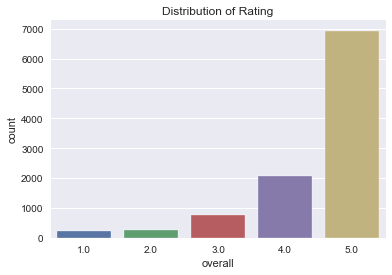

In [270]:
#EDA Visualize Rating Distribution #
sns.countplot(x='overall', data=df);
plt.title('Distribution of Rating');

In [271]:
import re
import string

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [272]:
df['Num_words_text'] = df['reviewText'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(df['overall'].value_counts())
print(len(df))
print('-------------------------')
max_review_data_sentence_length  = df['Num_words_text'].max()


print('No of Short reviews')

-------Dataset --------
5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64
10254
-------------------------
No of Short reviews


In [273]:
df = df.rename(columns={'overall':'rating'})
df['text'] = df['reviewText'] + ' ' + df['summary']
df.head()

,reviewText,rating,summary,reviewTime,Num_words_text,text
0,not much to write about here but it does exact...,5.0,good,"02 28, 2014",51,not much to write about here but it does exact...
1,the product does exactly as it should and is q...,5.0,Jake,"03 16, 2013",103,the product does exactly as it should and is q...
2,the primary job of this device is to block the...,5.0,It Does The Job Well,"08 28, 2013",77,the primary job of this device is to block the...
3,nice windscreen protects my mxl mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014",35,nice windscreen protects my mxl mic and preven...
4,this pop filter is great it looks and performs...,5.0,No more pops when I record my vocals.,"02 21, 2014",28,this pop filter is great it looks and performs...


In [274]:
# Personalizing Stopwords #
stopword1 = nltk.corpus.stopwords.words('english')
newStopWords = ['im','ive','theyre','hum']
stopword1.extend(newStopWords)


stop = set(stopword1)
punctuation = list(string.punctuation)

stop.update(punctuation)

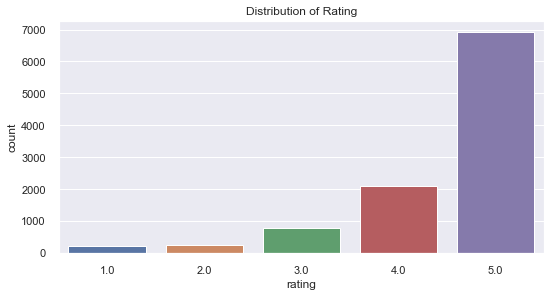

In [275]:
#EDA Visualize Rating Distribution #
sns.set(rc={'figure.figsize':(8.7,4.27)})
sns.countplot(x='rating', data=df);

plt.title('Distribution of Rating');
plt.savefig('ratings.png')

In [276]:
exclude_words = set(("not", "no","aren't","couldn't","didn't","doesn't","don't","hasn't","haven't","mightn't","mustn't","needn't","shouldn't","weren't"))

stop = stop - exclude_words



In [277]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'hum',
 'i',
 'if',
 'im',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'ive',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',

In [278]:
# Pre-processing & Lemmatizing text #

def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
    
# Lemmatizing words that are not stopwords

lemmatizer = WordNetLemmatizer()
def lemmatization1(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [279]:
df['text'] = df['text'].apply(lambda x : lemmatization1(x))

In [280]:
df.head()

,reviewText,rating,summary,reviewTime,Num_words_text,text
0,not much to write about here but it does exact...,5.0,good,"02 28, 2014",51,not much write exactly suppose filter pop soun...
1,the product does exactly as it should and is q...,5.0,Jake,"03 16, 2013",103,product exactly quite affordablei not realize ...
2,the primary job of this device is to block the...,5.0,It Does The Job Well,"08 28, 2013",77,primary job device block breath would otherwis...
3,nice windscreen protects my mxl mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014",35,nice windscreen protects mxl mic prevents pop ...
4,this pop filter is great it looks and performs...,5.0,No more pops when I record my vocals.,"02 21, 2014",28,pop filter great look performs like studio fil...


In [281]:
df["text"].head().values

array(['not much write exactly suppose filter pop sound recording much crisp one low price pop filter amazon might well buy honestly work despite pricing good',
       'product exactly quite affordablei not realize double screen arrive even well expectedas add bonus one screen carry small hint smell old grape candy use buy reminiscents sake cannot stop put pop filter next nose smell record dif need pop filter work well expensive one may even come please aroma like mine didbuy product jake',
       'primary job device block breath would otherwise produce pop sound allow voice pas no noticeable reduction volume high frequency double cloth filter block pop let voice no coloration metal clamp mount attache mike stand secure enough keep attach goose neck need little coax stay put job well',
       'nice windscreen protects mxl mic prevents pop thing gooseneck marginally able hold screen position require careful position clamp avoid sag good windscreen money',
       'pop filter great look p

In [282]:
df = df.drop(columns=['reviewText','summary', 'reviewTime', 'Num_words_text'])

# Spliting Data to two groups: Bad Reviews vs. Good Reviews

In [283]:
df_bad=df[(df.rating == 1.0) | (df.rating== 2.0) ]
df_bad

,rating,text
15,2.0,bought use keyboard wasnt really aware option ...
50,2.0,didnt expect cable thin easily thickness guita...
52,1.0,hum crackle think problem equipment soon use c...
89,1.0,procheapo hat thing noisy cable feel really ch...
98,2.0,bought canon vixia hf video camera shotgun mic...
...,...,...
10171,1.0,really want like frickin lintcatching sticky f...
10178,2.0,large one sometimes neck snap thought might an...
10187,2.0,tension screw adjustment remains best capo eve...
10189,2.0,fan planet wave n capo new one not well design...


In [284]:
df_good=df[(df.rating == 3.0) |(df.rating == 4.0) | (df.rating== 5.0) ]
df_good

,rating,text
0,5.0,not much write exactly suppose filter pop soun...
1,5.0,product exactly quite affordablei not realize ...
2,5.0,primary job device block breath would otherwis...
3,5.0,nice windscreen protects mxl mic prevents pop ...
4,5.0,pop filter great look performs like studio fil...
...,...,...
10256,5.0,great expect thank five stars
10257,5.0,think try nanoweb string bit put high price co...
10258,4.0,try coat string past include elixir never fond...
10259,4.0,well make elixir developed taylor guitar strin...


In [285]:
df.head()

,rating,text
0,5.0,not much write exactly suppose filter pop soun...
1,5.0,product exactly quite affordablei not realize ...
2,5.0,primary job device block breath would otherwis...
3,5.0,nice windscreen protects mxl mic prevents pop ...
4,5.0,pop filter great look performs like studio fil...


# Bad Review -LDA

In [286]:
def lemmatization2(texts): 
    output = []
    for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc ])
    return output

In [287]:
text_list=df_bad['text'].tolist()
print(text_list[1])
tokenized_reviews_bad = lemmatization2(text_list)
print(tokenized_reviews_bad[1])

didnt expect cable thin easily thickness guitar cable use not sure longterm durability signal lossinterference foresight id spend couple extra buck thicker cable still work inexpensiveedit month later dead already wire frayed right angle jack get pay cannot recommend
['do', 'not', 'expect', 'cable', 'thin', 'easily', 'thickness', 'guitar', 'cable', 'use', 'not', 'sure', 'longterm', 'durability', 'signal', 'lossinterference', 'foresight', '-PRON-', 'd', 'spend', 'couple', 'extra', 'buck', 'thicker', 'cable', 'still', 'work', 'inexpensiveedit', 'month', 'later', 'dead', 'already', 'wire', 'fray', 'right', 'angle', 'jack', 'get', 'pay', 'can', 'not', 'recommend']


In [288]:
dictionary = corpora.Dictionary(tokenized_reviews_bad)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews_bad]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel


# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=100, passes=50,iterations=100) 

In [289]:
lda_model.print_topics()

[(0,
  '0.007*"hole" + 0.007*"cable" + 0.007*"mount" + 0.006*"midi" + 0.006*"receive" + 0.006*"weld" + 0.005*"send" + 0.005*"lock" + 0.005*"long" + 0.005*"back"'),
 (1,
  '0.032*"not" + 0.025*"pedal" + 0.021*"sound" + 0.018*"amp" + 0.016*"get" + 0.011*"work" + 0.010*"use" + 0.010*"record" + 0.009*"like" + 0.009*"want"'),
 (2,
  '0.039*"not" + 0.013*"one" + 0.013*"do" + 0.012*"guitar" + 0.011*"string" + 0.010*"get" + 0.010*"use" + 0.009*"well" + 0.009*"like" + 0.009*"work"'),
 (3,
  '0.039*"not" + 0.016*"stand" + 0.015*"guitar" + 0.012*"do" + 0.012*"use" + 0.011*"get" + 0.011*"mic" + 0.011*"one" + 0.011*"well" + 0.010*"would"'),
 (4,
  '0.015*"battery" + 0.010*"software" + 0.009*"interface" + 0.008*"use" + 0.008*"pitch" + 0.007*"function" + 0.005*"manual" + 0.005*"focusrite" + 0.005*"driver" + 0.005*"user"')]

In [290]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.177047  0.050756       1        1  45.233932
3     -0.133374  0.120857       2        1  23.159529
1     -0.097189 -0.194420       3        1  20.837764
4      0.227514  0.044337       4        1   5.964341
0      0.180096 -0.021530       5        1   4.804433, topic_info=        Term        Freq       Total Category  logprob  loglift
30     pedal  171.000000  171.000000  Default  30.0000  30.0000
251    sound  227.000000  227.000000  Default  29.0000  29.0000
288      amp  103.000000  103.000000  Default  28.0000  28.0000
26       not  931.000000  931.000000  Default  27.0000  27.0000
733    stand  102.000000  102.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
744     poor    4.411748   17.524433   Topic5  -5.7100   1.6563
1668   black    3.997592    9.839223   Topic5  -5.8085   2.1349
645   design    4.434006   40.050896   Topic5  -5.7049   0.8348
158      try    4.245627  130.543346   Topic5  -5.7484  -0.3902
146   return    4.122262   67.312968   Topic5  -5.7778   0.2427

[319 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
599       1  0.379517      !
599       2  0.602763      !
4218      5  0.922181      #
2178      5  0.652104      (
2179      5  0.918032      )
...     ...       ...    ...
45        3  0.309205   work
165       1  0.597638  would
165       2  0.331417  would
165       3  0.070630  would
1632      5  0.881144   yeti

[427 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 5, 1])

# Good Reviews - LDA

In [291]:
text_list=df_good['text'].tolist()
print(text_list[1])
tokenized_reviews_good = lemmatization2(text_list)
print(tokenized_reviews_good[1])

product exactly quite affordablei not realize double screen arrive even well expectedas add bonus one screen carry small hint smell old grape candy use buy reminiscents sake cannot stop put pop filter next nose smell record dif need pop filter work well expensive one may even come please aroma like mine didbuy product jake
['product', 'exactly', 'quite', 'affordablei', 'not', 'realize', 'double', 'screen', 'arrive', 'even', 'well', 'expecteda', 'add', 'bonus', 'one', 'screen', 'carry', 'small', 'hint', 'smell', 'old', 'grape', 'candy', 'use', 'buy', 'reminiscent', 'sake', 'can', 'not', 'stop', 'put', 'pop', 'filter', 'next', 'nose', 'smell', 'record', 'dif', 'need', 'pop', 'filter', 'work', 'well', 'expensive', 'one', 'may', 'even', 'come', 'please', 'aroma', 'like', 'mine', 'didbuy', 'product', 'jake']


In [292]:
dictionary = corpora.Dictionary(tokenized_reviews_good)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews_good]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel


# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=100, passes=50,iterations=100) 

In [293]:
lda_model.print_topics()

[(0,
  '0.043*"pedal" + 0.029*"amp" + 0.021*"sound" + 0.015*"record" + 0.013*"use" + 0.012*"cable" + 0.011*"mic" + 0.011*"power" + 0.008*"plug" + 0.008*"knob"'),
 (1,
  '0.045*"pick" + 0.022*"effect" + 0.017*"s" + 0.015*"that" + 0.015*"unit" + 0.015*"two" + 0.014*"case" + 0.013*"right" + 0.012*"read" + 0.011*"note"'),
 (2,
  '0.093*"capo" + 0.030*"design" + 0.027*"fret" + 0.024*"tension" + 0.020*"headstock" + 0.017*"finger" + 0.015*"tight" + 0.013*"clip" + 0.011*"nut" + 0.010*"install"'),
 (3,
  '0.036*"not" + 0.020*"guitar" + 0.017*"great" + 0.016*"use" + 0.016*"good" + 0.015*"well" + 0.015*"one" + 0.014*"string" + 0.013*"like" + 0.012*"get"'),
 (4,
  '0.040*"strap" + 0.033*"tone" + 0.023*"bag" + 0.022*"joyo" + 0.022*"distortion" + 0.021*"button" + 0.014*"overdrive" + 0.012*"drive" + 0.011*"metal" + 0.010*"expect"')]

In [294]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.343974  0.027219       1        1  65.916303
0     -0.168363 -0.026301       2        1  16.582398
1      0.157214 -0.312139       3        1   8.773146
4      0.166931  0.214557       4        1   4.686688
2      0.188191  0.096663       5        1   4.041464, topic_info=        Term         Freq        Total Category  logprob  loglift
181    pedal  3479.000000  3479.000000  Default  30.0000  30.0000
2185    capo  1814.000000  1814.000000  Default  29.0000  29.0000
1088    tone  2010.000000  2010.000000  Default  28.0000  28.0000
903     pick  1914.000000  1914.000000  Default  27.0000  27.0000
158      amp  2339.000000  2339.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2199  remove   115.030704   197.561385   Topic5  -5.1368   2.6677
1180    onto    89.930185   113.059485   Topic5  -5.3830   2.9797
593    leave   128.093616   413.989649   Topic5  -5.0293   2.0355
1629    rest    90.626222   135.184754   Topic5  -5.3753   2.8087
772    right   118.158242  1045.281346   Topic5  -5.1100   1.0285

[224 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
281       1  0.999472       !
399       1  0.999638       ,
109       1  0.932448  -PRON-
109       2  0.067316  -PRON-
508       4  0.993507       ?
...     ...       ...     ...
18        1  0.999842    well
19        1  0.900473    work
19        2  0.099447    work
91        1  0.999615   would
4958      4  0.992738      xl

[234 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3])

# Bad Reviews -NMF

In [295]:
# Topic Modeling - NMF#  -- Bad
n_topics = 5
random_state=0
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df_bad.text)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

NMF(n_components=5, random_state=0)

In [296]:
n_top_words = 15
feature_names = vec.get_feature_names()

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
   
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 stand work use guitar mic product try make great tuner doesnt like price look good 
1 string sound guitar like set high play tune change low ball steel pick dont nylon 
2 pedal sound amp distortion effect tone like behringer use volume bos want noise unit reverb 
3 cable work buy jack cheap long plug connector didnt problem xlr signal cord time month 
4 strap guitar lock leather fit uncomfortable button play levy dont short neck electric big model 


# Good Reviews - NMF

In [297]:
n_topics = 5
random_state=0
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df_good.text)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

NMF(n_components=5, random_state=0)

In [298]:
n_top_words = 15
feature_names = vec.get_feature_names()

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
   
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 cable great tuner work stand good guitar use price mic quality easy product tune need 
1 string sound guitar play great acoustic good use strings tune tone set elixir daddario change 
2 strap guitar lock leather nice comfortable button look great like make fit good end shoulder 
3 pick grip play like use dunlop picks holder guitar nice hold good great jazz try 
4 pedal amp sound tone effect like power use distortion great board tube delay really overdrive 


In [299]:
# TF-IDF #

vec = TfidfVectorizer(stop_words="english")
vec.fit(df_bad.text.values)
features = vec.transform(df_bad.text.values)

In [300]:
## K- Means Clustering#
random_state = 0 

cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(n_clusters=5, random_state=0)

In [301]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([3, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 1, 0, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 0, 1, 3, 2, 0, 2, 2,
       4, 3, 2, 3, 1, 2, 0, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 1, 1, 1, 1, 4,
       4, 3, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 4, 2, 2, 2, 1,
       2, 0, 0, 2, 1, 2, 0, 2, 4, 2, 1, 1, 2, 1, 4, 0, 2, 0, 4, 2, 0, 3,
       1, 1, 1, 0, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 4, 1, 4, 2, 4, 1, 2, 2, 2, 0, 0, 2, 3, 2, 0, 3, 2, 2, 2, 2,
       2, 0, 2, 4, 0, 2, 2, 3, 3, 2, 2, 2, 2, 0, 3, 2, 3, 1, 3, 2, 2, 2,
       3, 4, 3, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 3, 3, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 2, 0, 2, 2,
       0, 4, 2, 3, 3, 3, 3, 2, 2, 0, 2, 3, 2, 2, 0, 2, 0, 0, 4, 2, 2, 1,
       3, 3, 3, 3, 2, 1, 0, 0, 0, 3, 2, 2, 2, 2, 3,

In [302]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

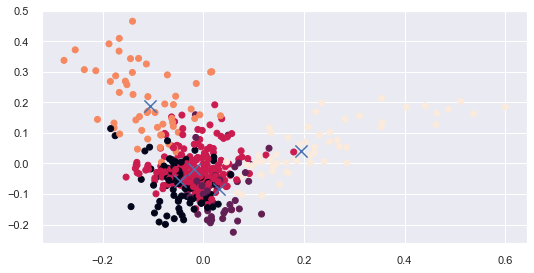

In [303]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.savefig('bad.png')

In [307]:
# TF-IDF #

vec = TfidfVectorizer(stop_words="english")
vec.fit(df_good.text.values)
features = vec.transform(df_good.text.values)

In [308]:
## K- Means Clustering#
random_state = 0 

cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(n_clusters=5, random_state=0)

In [309]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [310]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

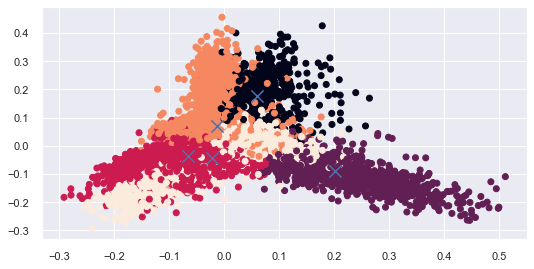

In [311]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.savefig('good.png')

In [312]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.011882087369832806

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

In [ ]:
# DBSCAN #

In [ ]:
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift

In [ ]:
# Standardize our data for DBSCAN and fit DBSCAN
X = StandardScaler().fit_transform(reduced_features)
db = DBSCAN(eps=0.15, min_samples=3).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true=df.text


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(dpi=200)
show_core = True
show_non_core = True
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    if show_core:
        xy = X[class_member_mask & core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1) # add black border for core points
    
    if show_non_core:
        xy = X[class_member_mask & ~core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);

In [ ]:
df_bad['word_count'] = df_bad['text'].apply(lambda x: len(str(x).split()))
df_bad

In [ ]:
df_good['word_count'] = df_good['text'].apply(lambda x: len(str(x).split()))
df_good

In [ ]:
# Create N-grams #

In [ ]:
from collections import defaultdict
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

df_pos = df_good.dropna()
df_neg = df_bad.dropna()

def create_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=True,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


In [ ]:
## positive ##
for sent in df_pos["text"]:
    for word in create_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in df_neg["text"]:
    for word in create_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = bar_chart(fd_sorted.head(25), 'red')


# Creating two subplots
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Positive reviews", 
                                          "Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

In [ ]:
text = df_bad["text"]
wordcloud = WordCloud(width=2200, height=1500, max_font_size=300, min_font_size=20,background_color = 'white',
    stopwords = stop).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'b',
    edgecolor = 'b')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('bad_cloud.png')
plt.show()


In [ ]:
text = df_good["text"]
wordcloud = WordCloud(width=2200, height=1500, max_font_size=300, min_font_size=20,background_color = 'white',
    stopwords = stop).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'b',
    edgecolor = 'b')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('good_cloud.png')
plt.show()
